## Mean squere errors

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def plot_mean_square_error(function, degrees, n_samples):
    
    X = np.sort(np.random.rand(n_samples))
    y = function(X) + np.random.randn(n_samples) * 0.1

    plt.figure(figsize=(20, 10))
    errors = []
    
    for i in range(len(degrees)):

        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error", cv=10)
        errors.append(scores.std())
    
    plt.plot(degrees, errors, 'k^:')   
    plt.xlabel("degree")
    plt.ylabel("mean squere error")
    plt.title("MSE function: {}  n_samples: {}".format(function.__name__, n_samples))
    plt.show()

In [2]:
np.random.seed(0)
degrees = [i for i in range(1, 31)]
ns_samples = [i for i in range (10,25, 1)]

## Noise model depending on number of samples
Shown on cosine and tagent function

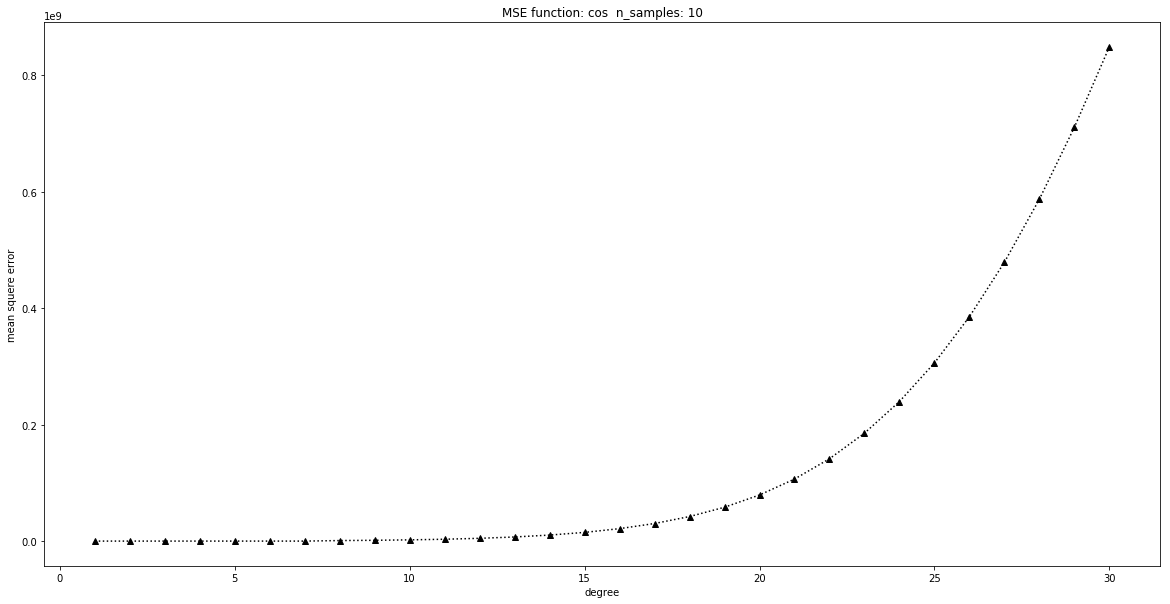

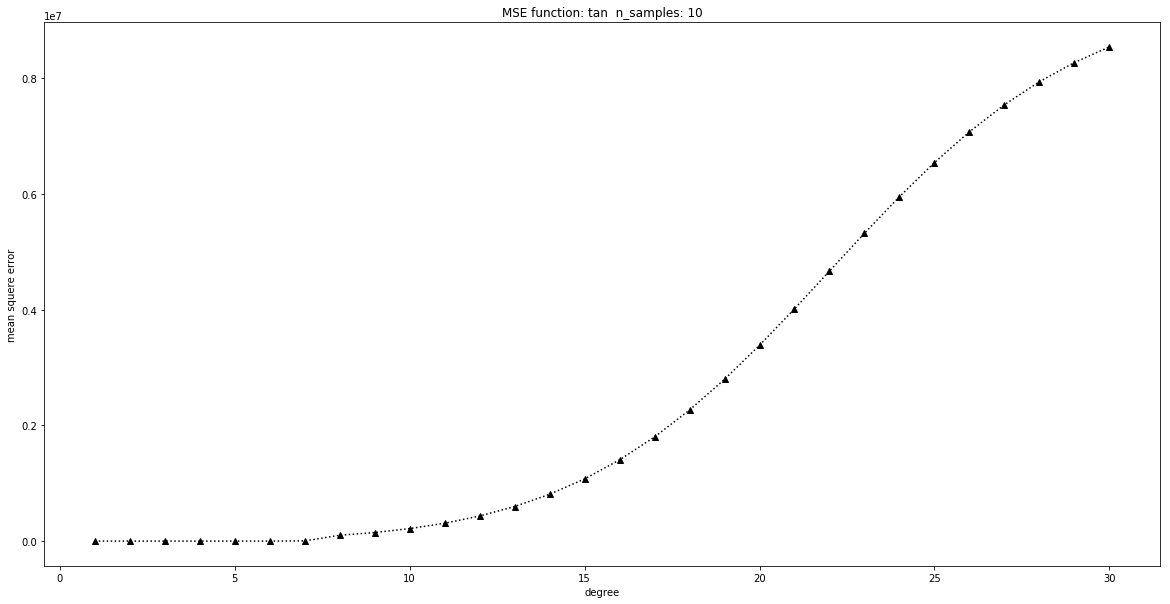

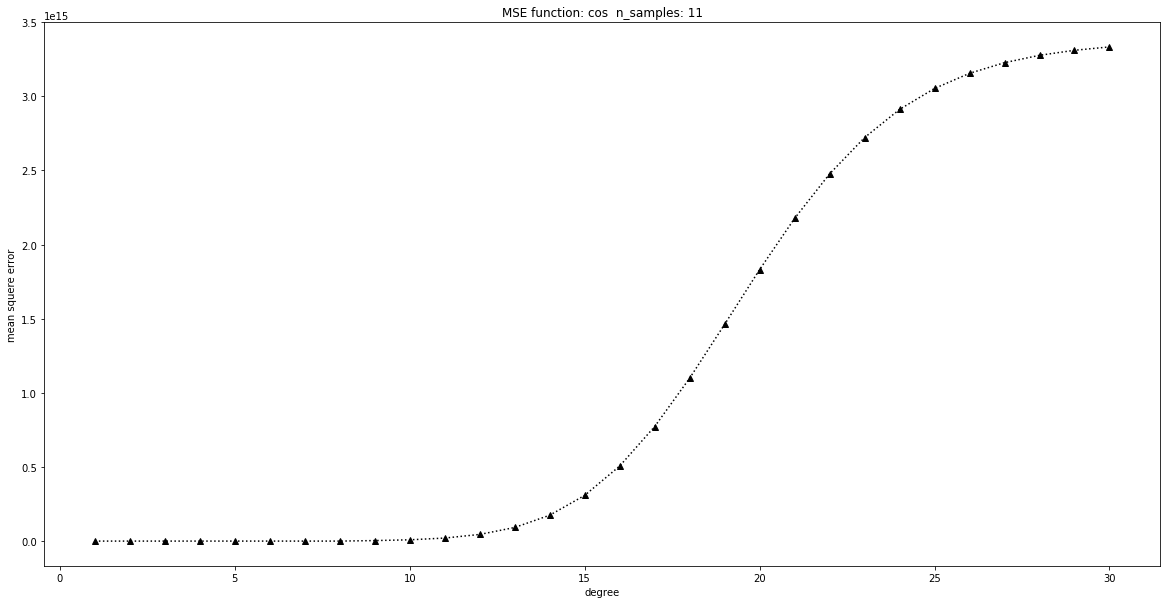

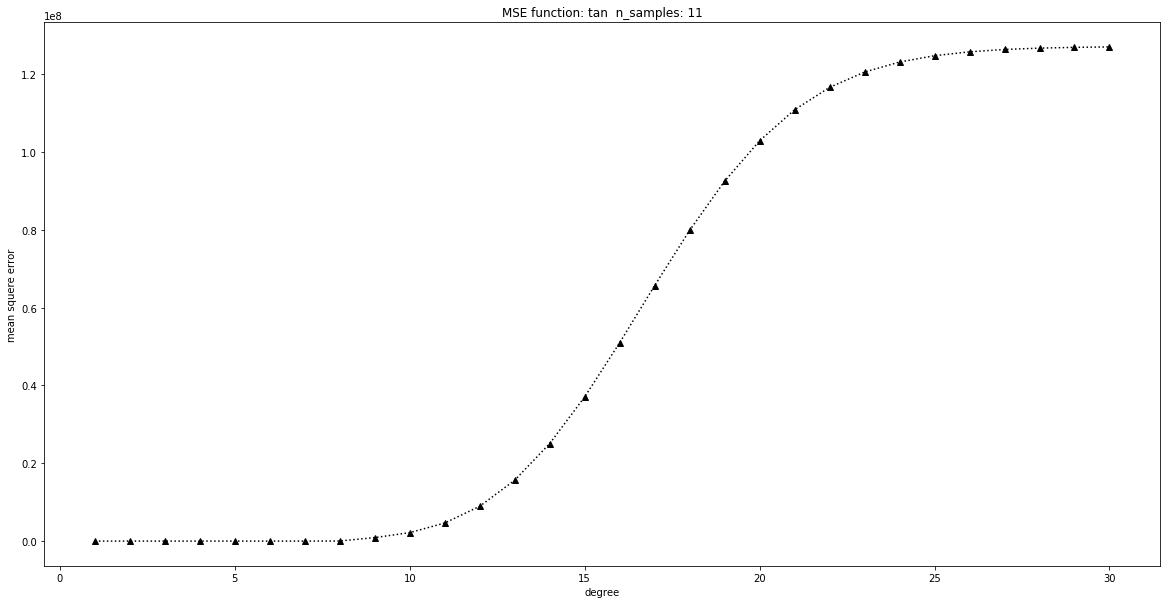

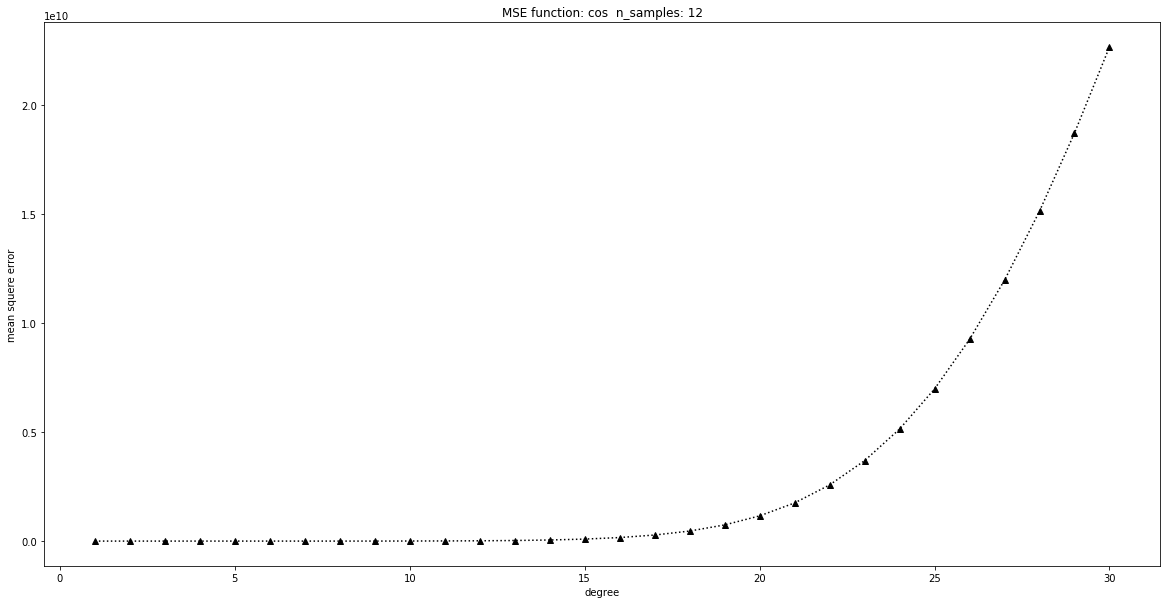

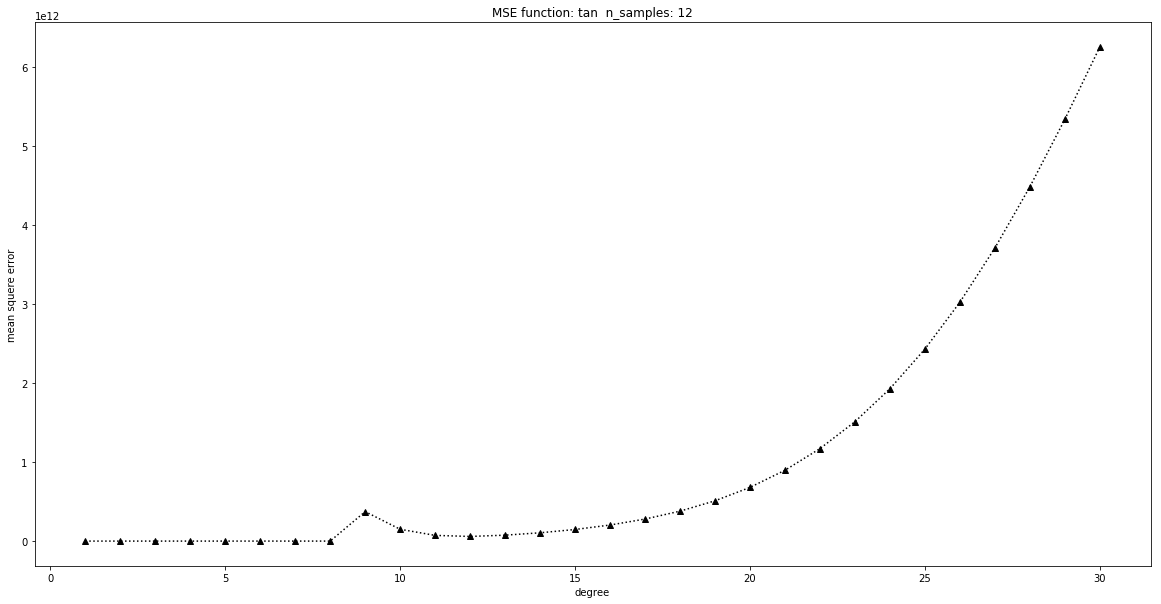

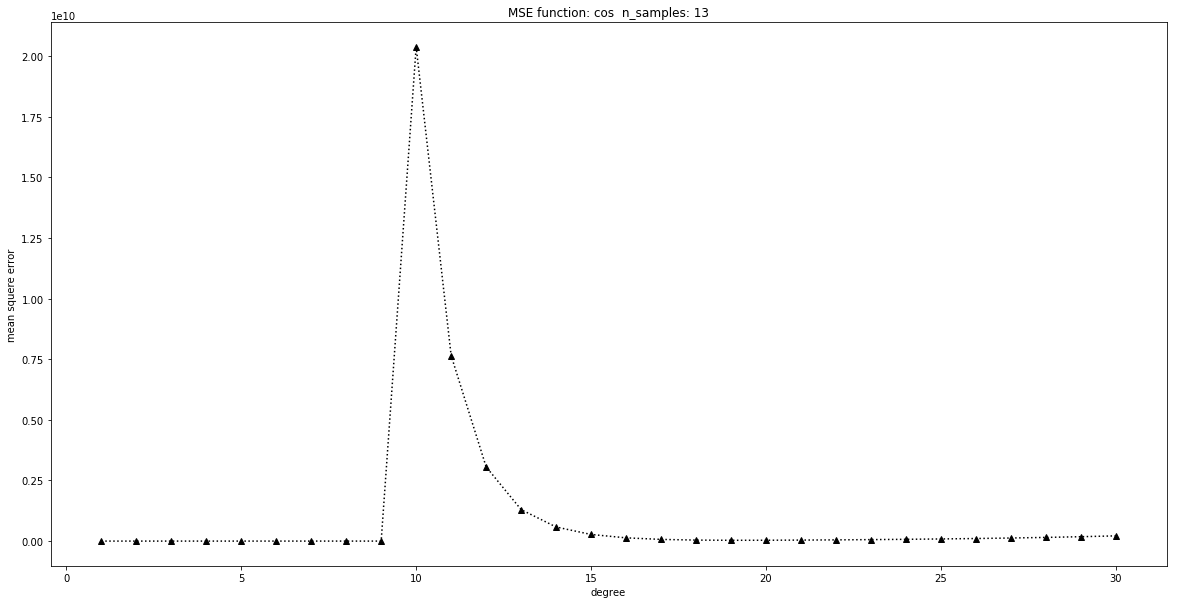

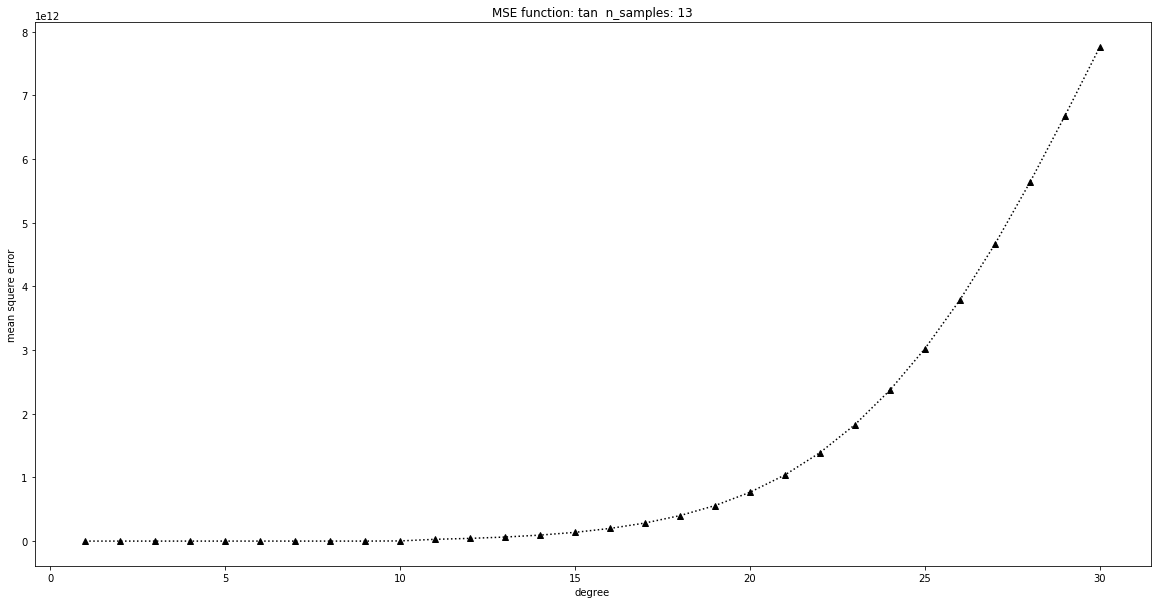

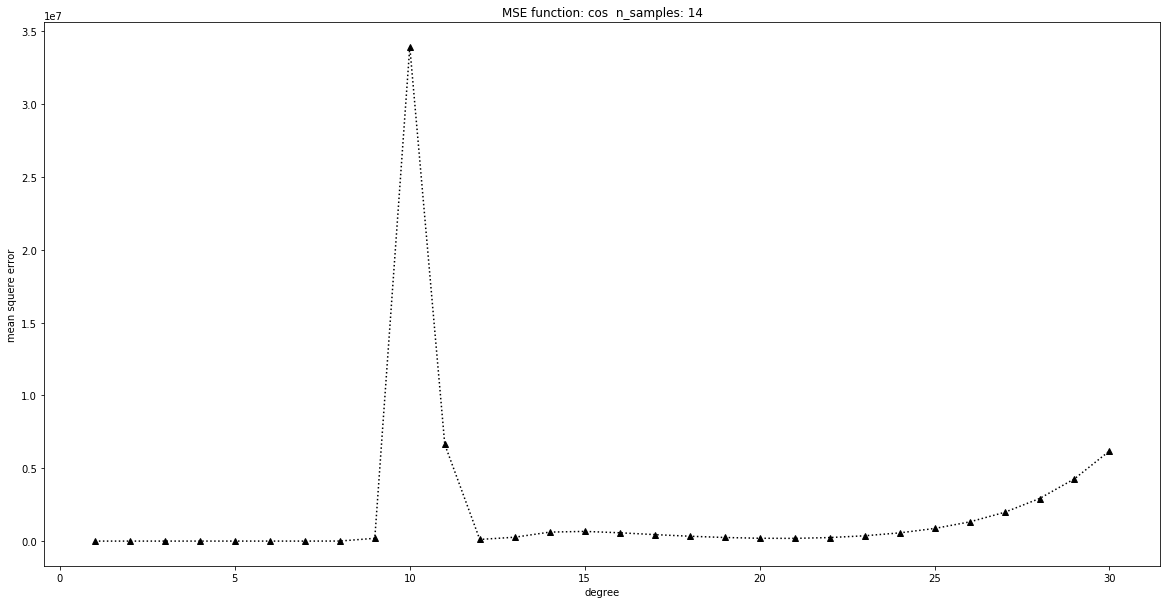

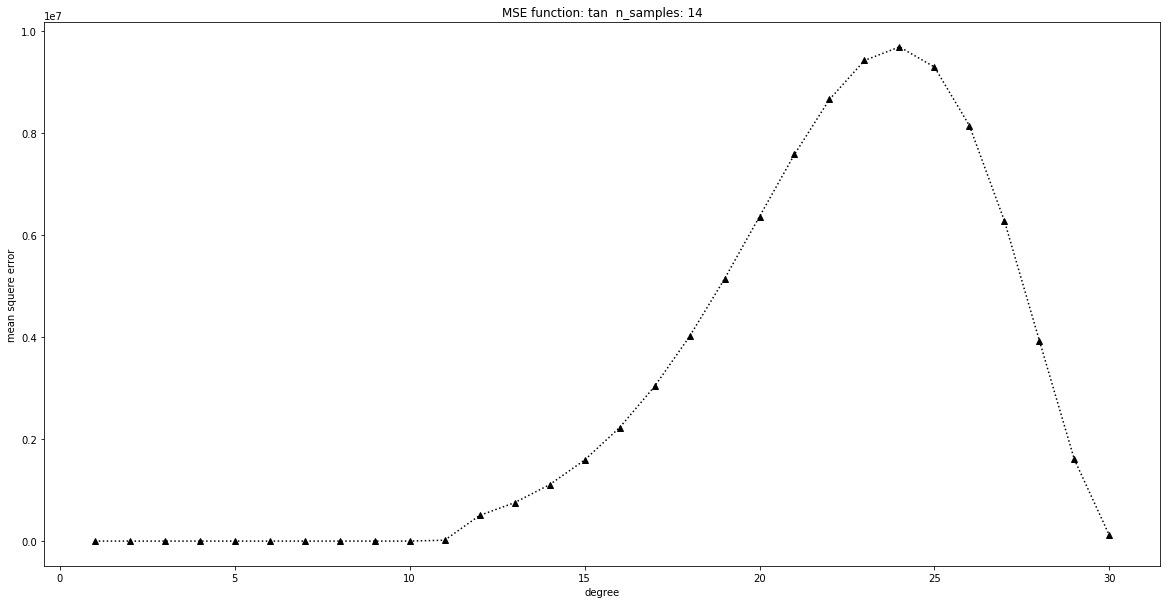

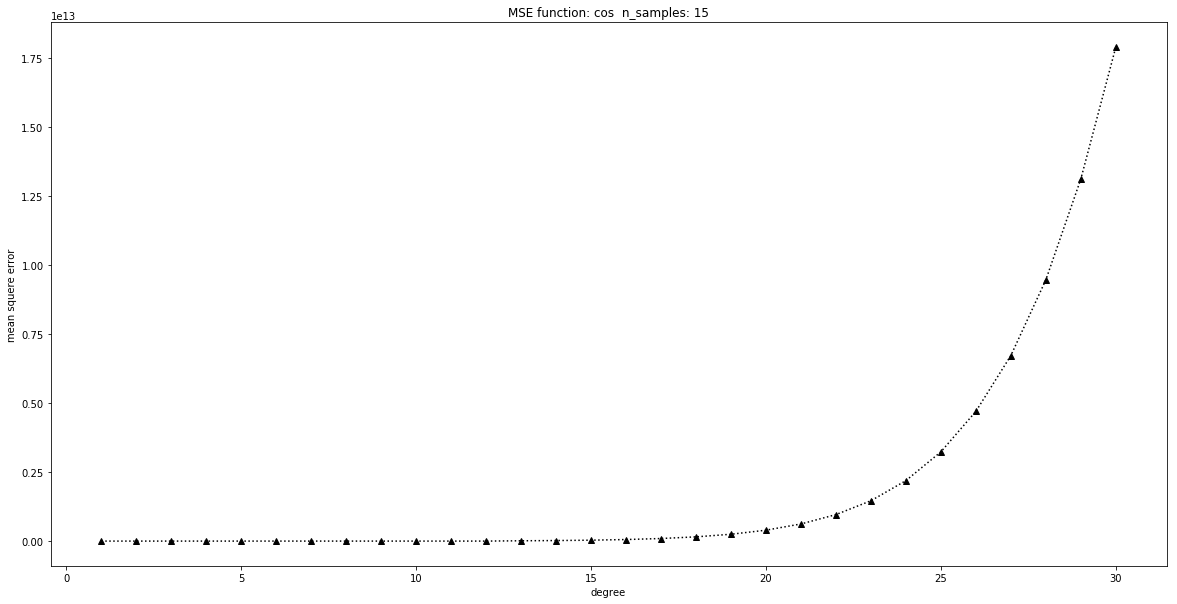

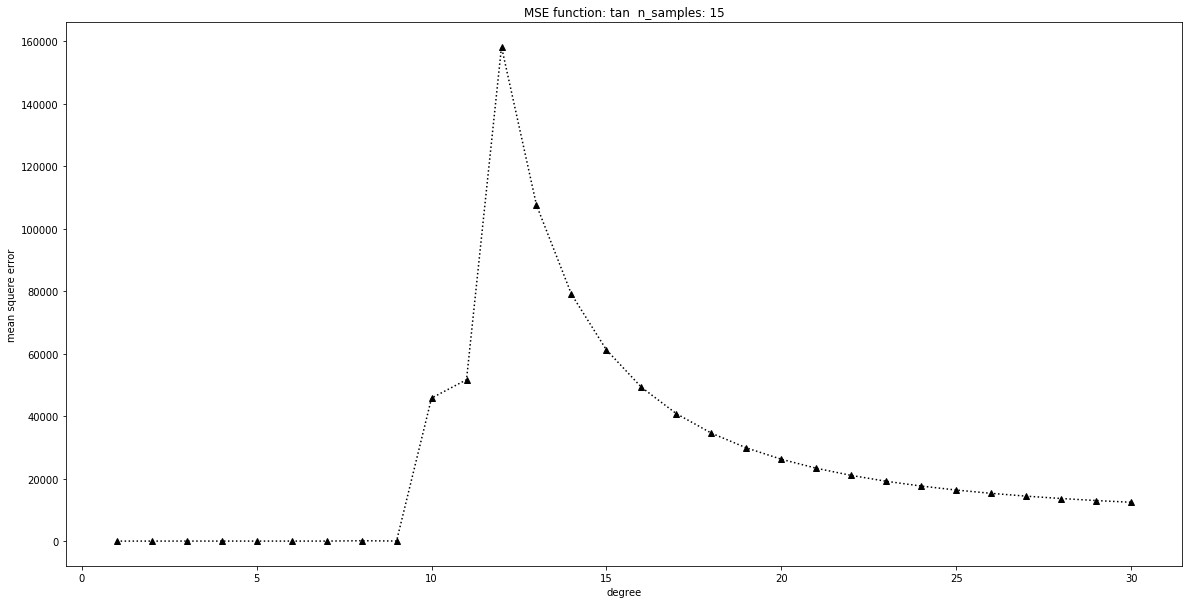

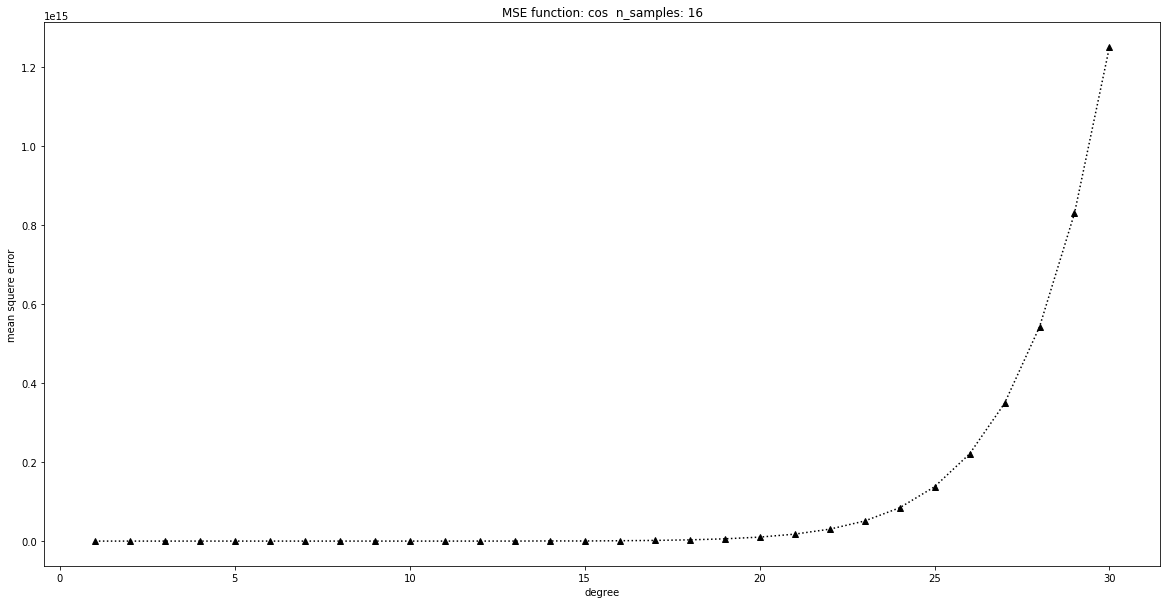

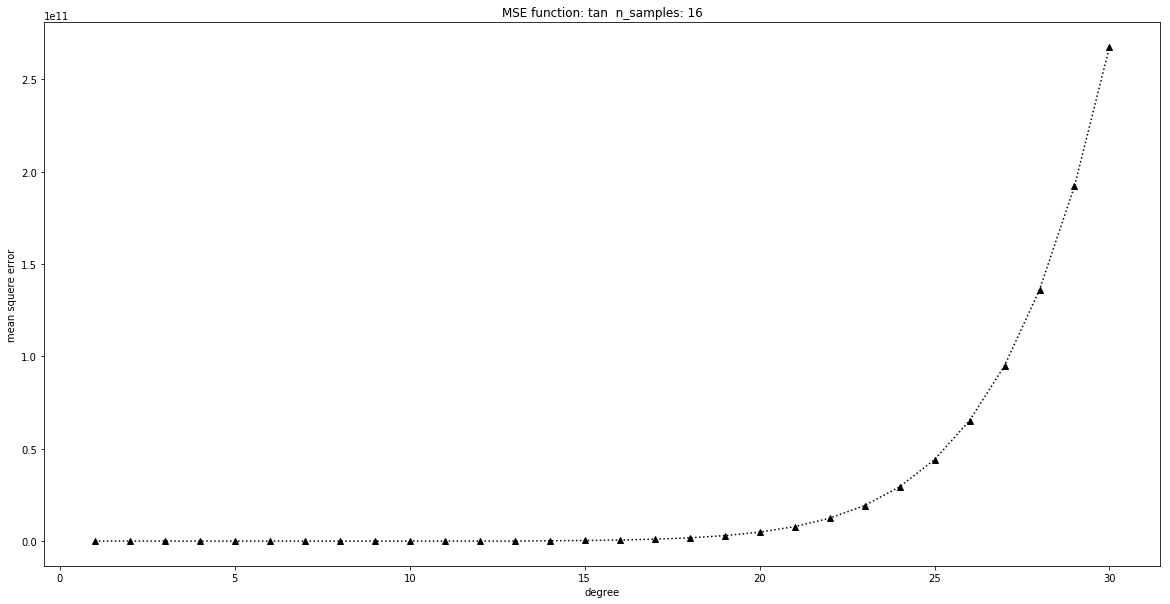

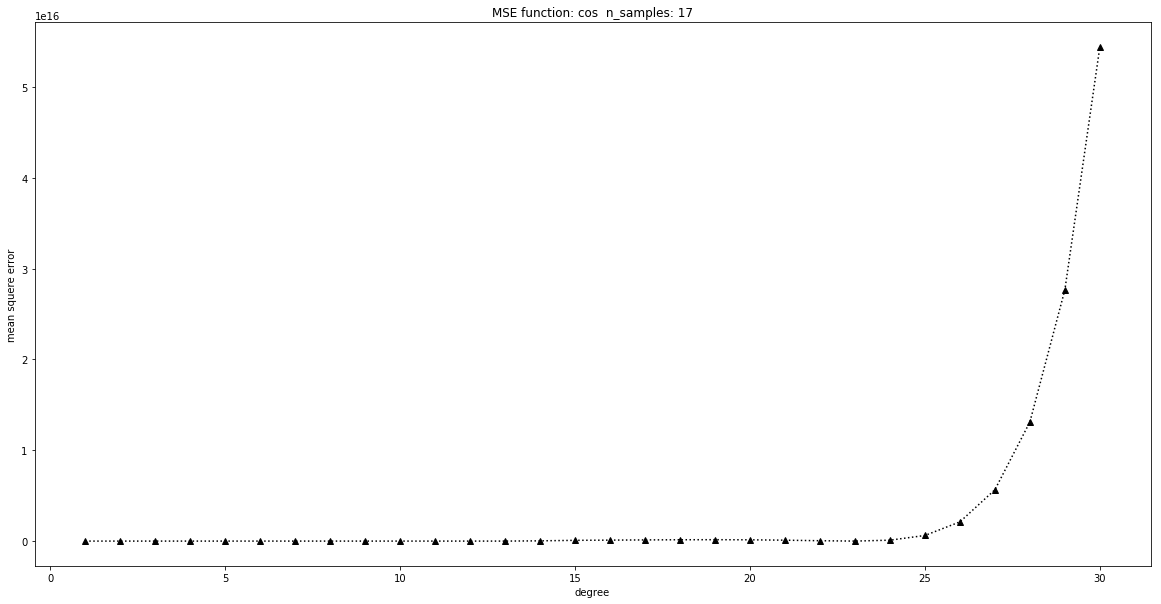

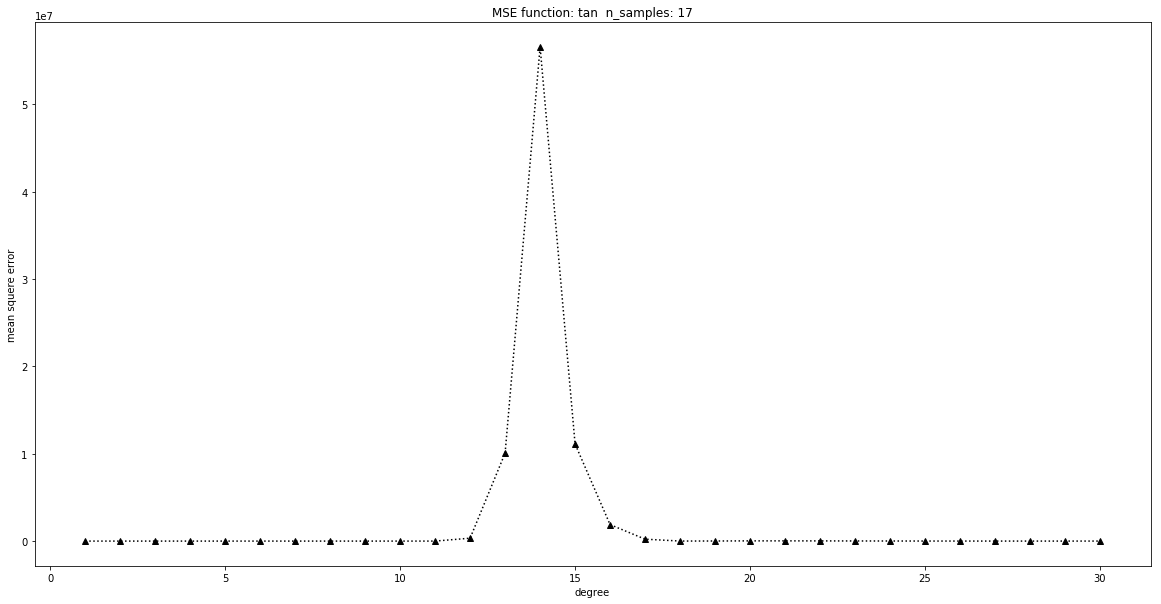

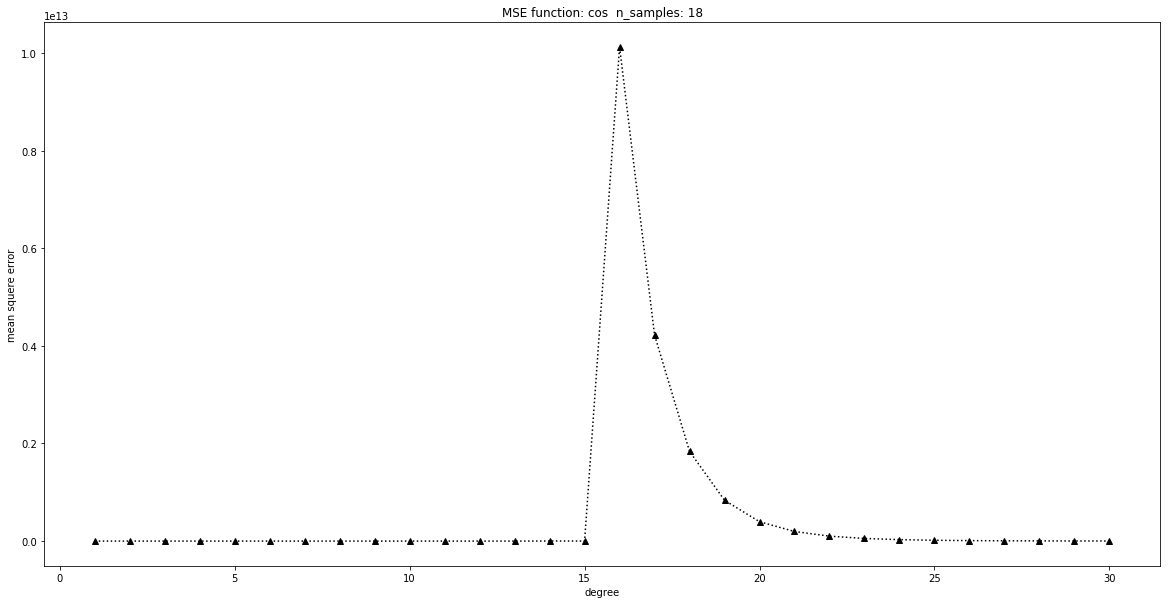

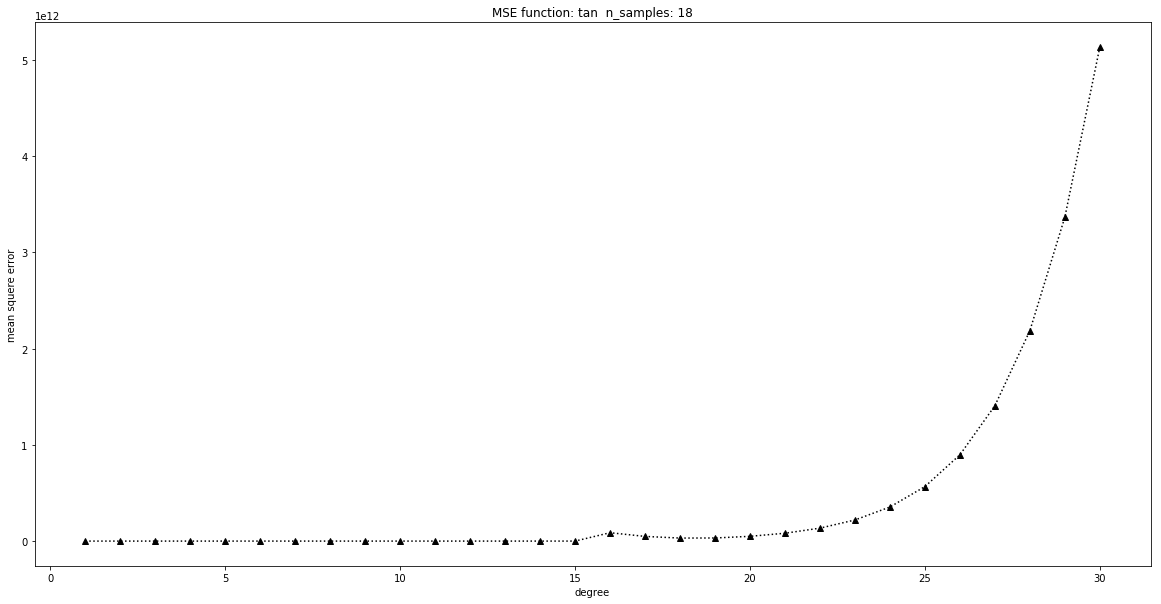

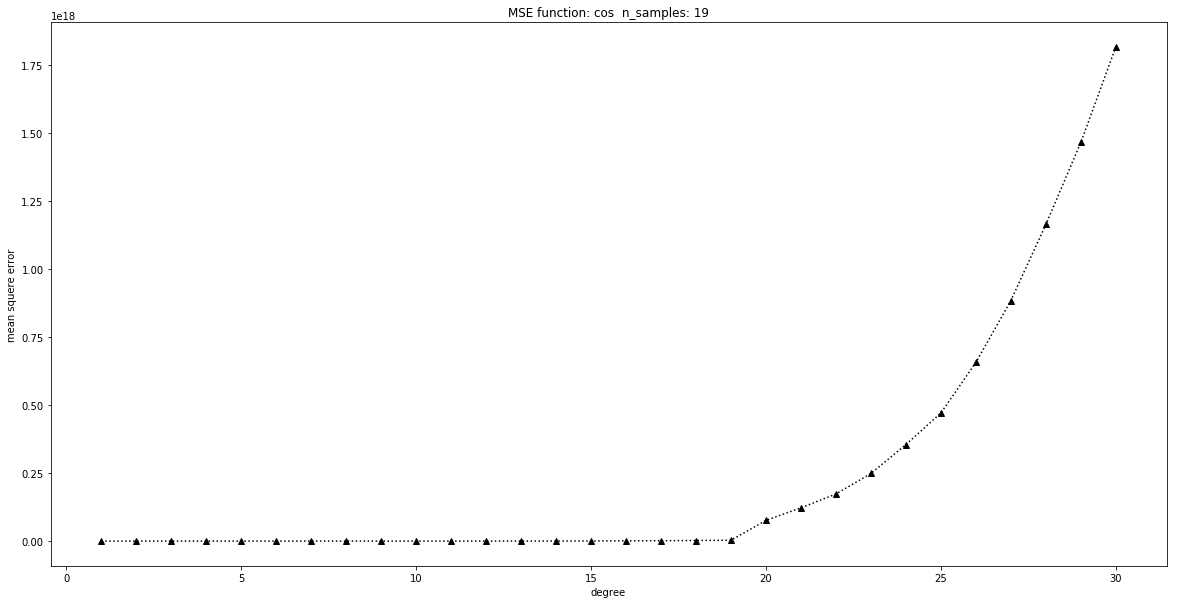

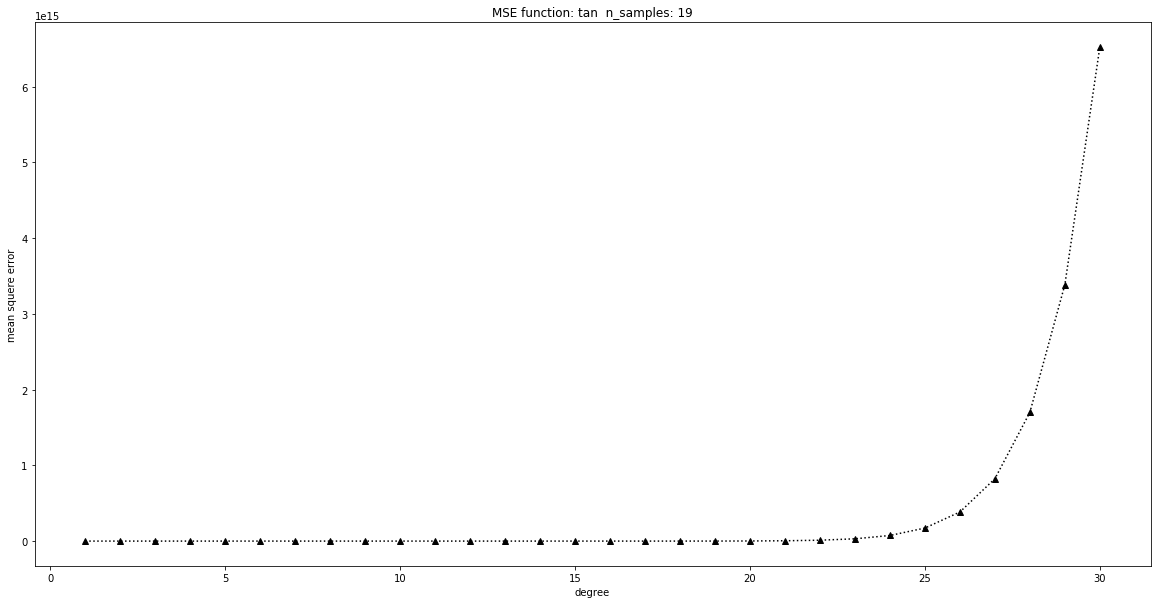

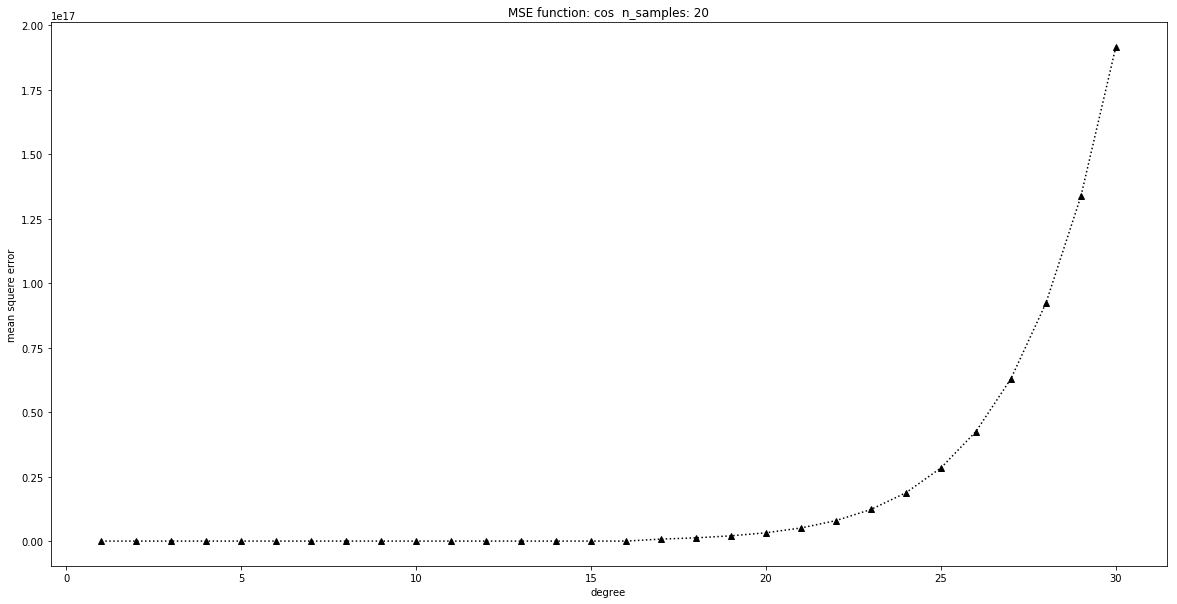

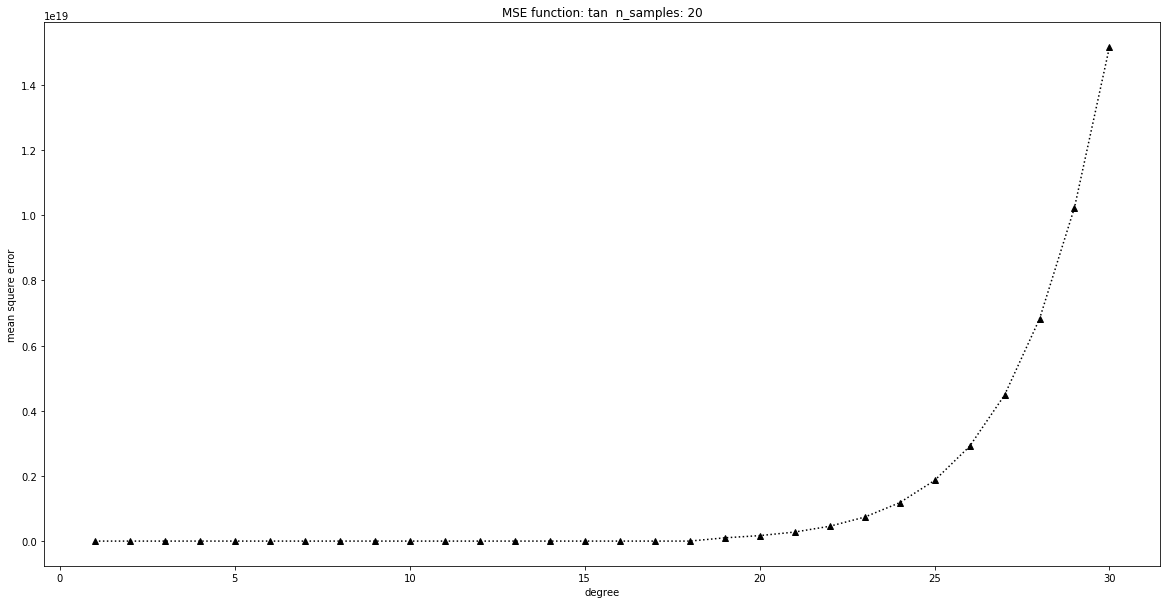

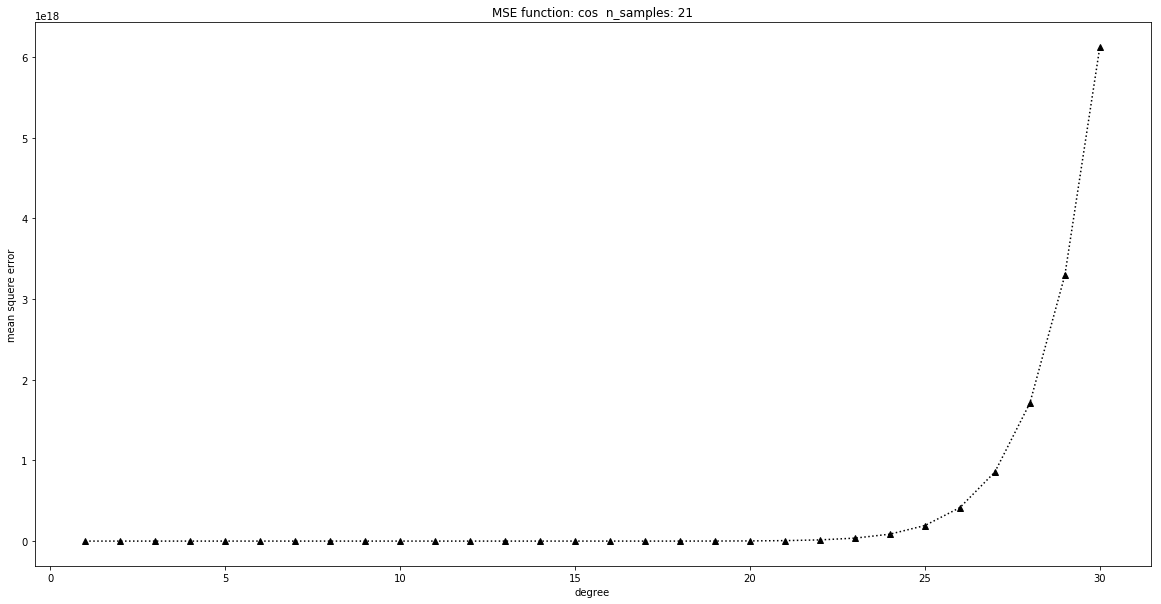

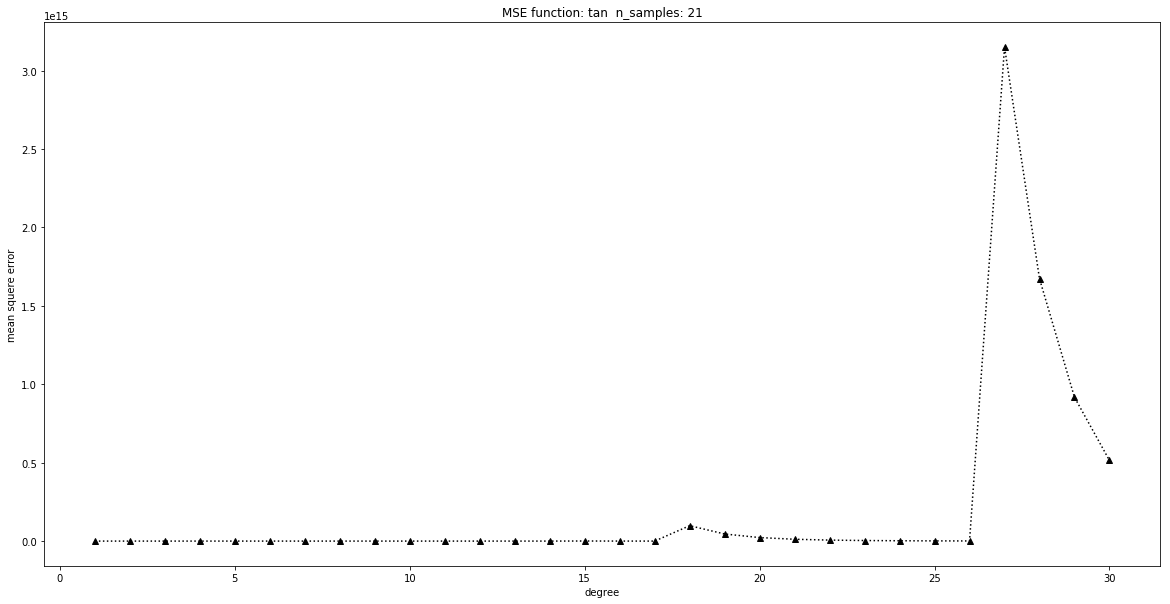

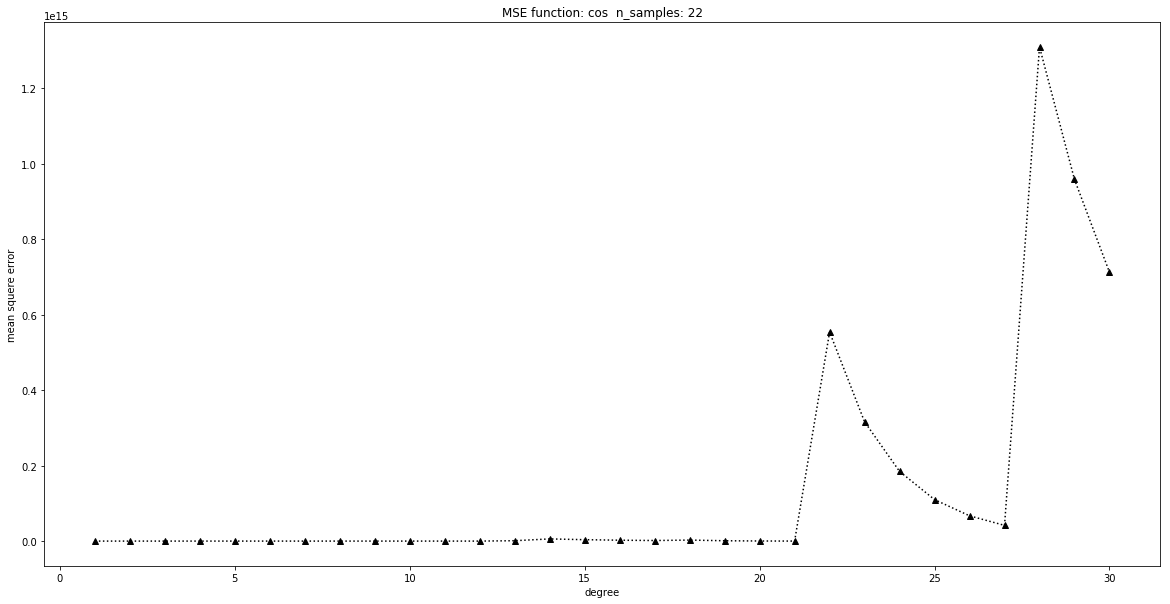

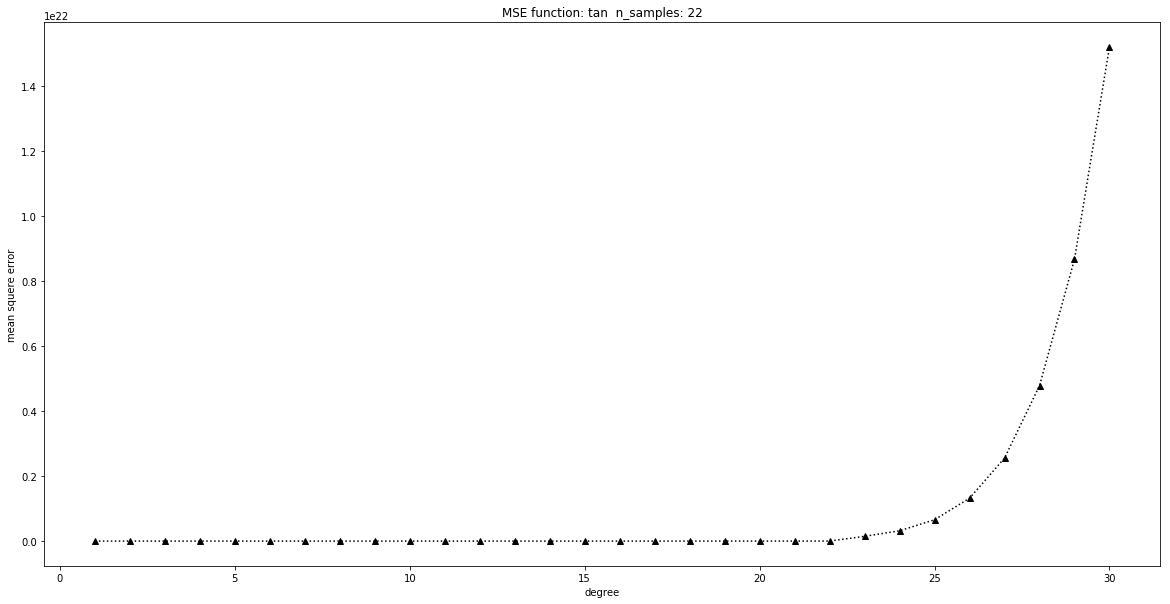

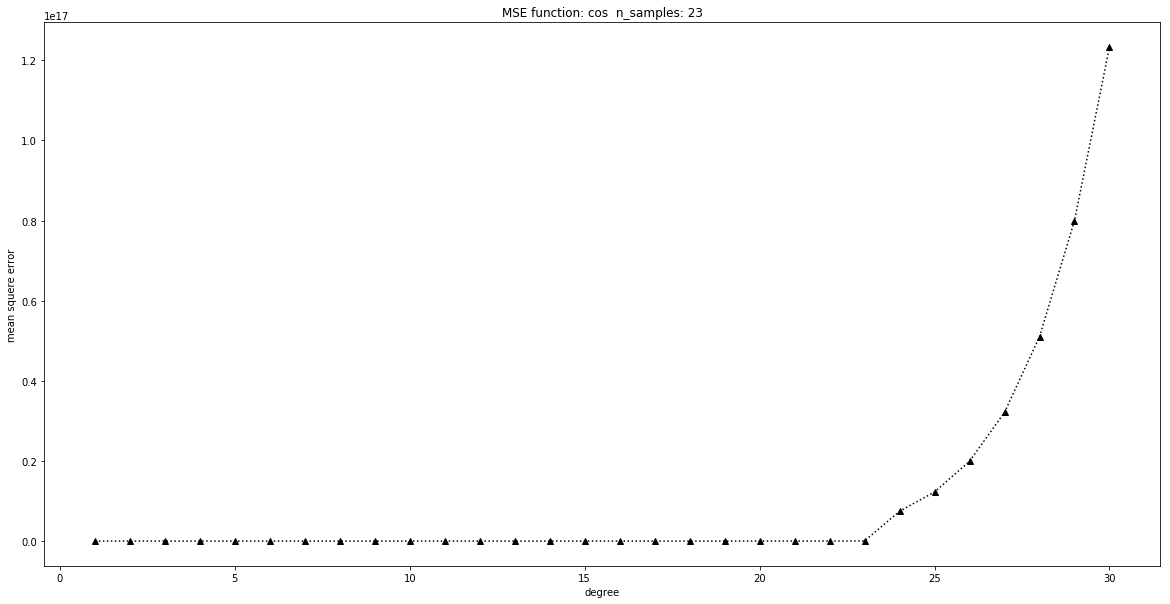

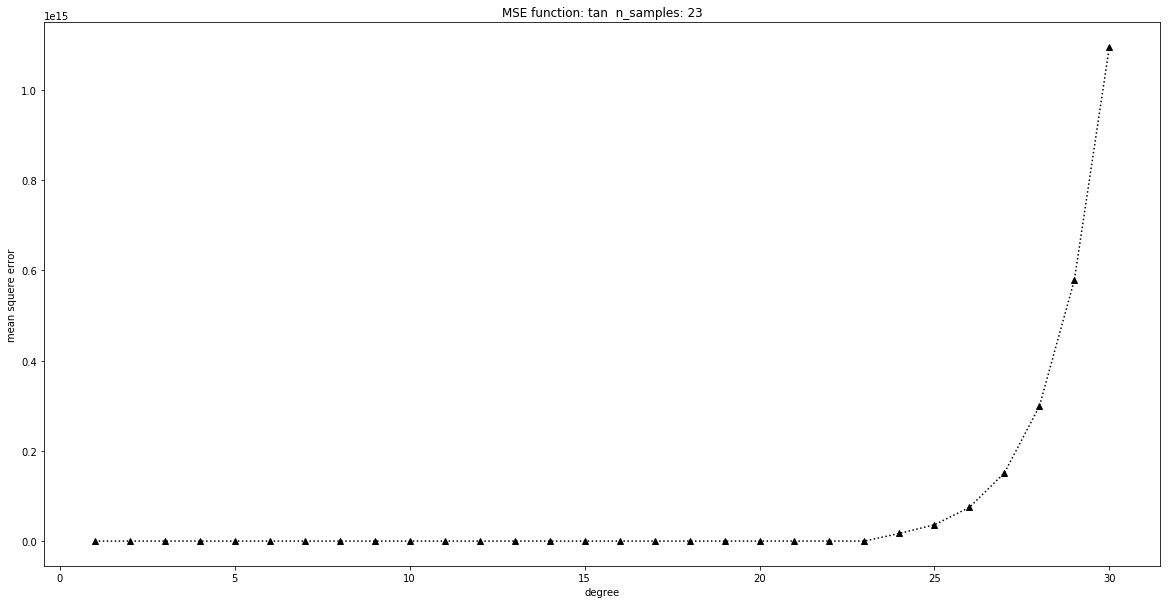

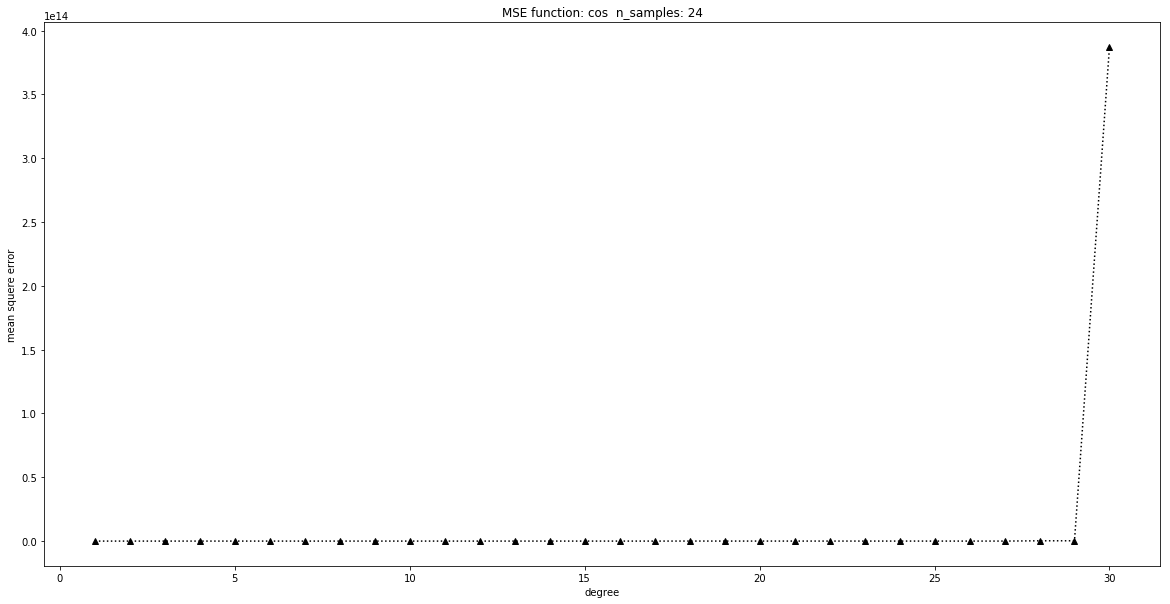

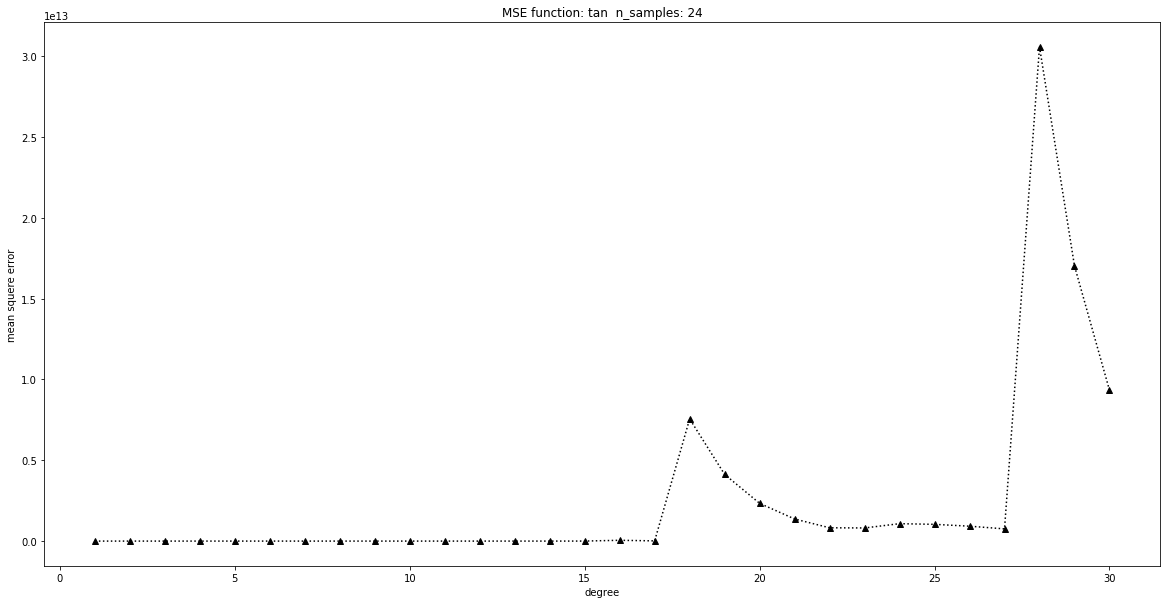

In [3]:
for n_samples in ns_samples:
    plot_mean_square_error(np.cos, degrees, n_samples)
    plot_mean_square_error(np.tan, degrees, n_samples)

## Noise model depending on function
With number of samples set to 10

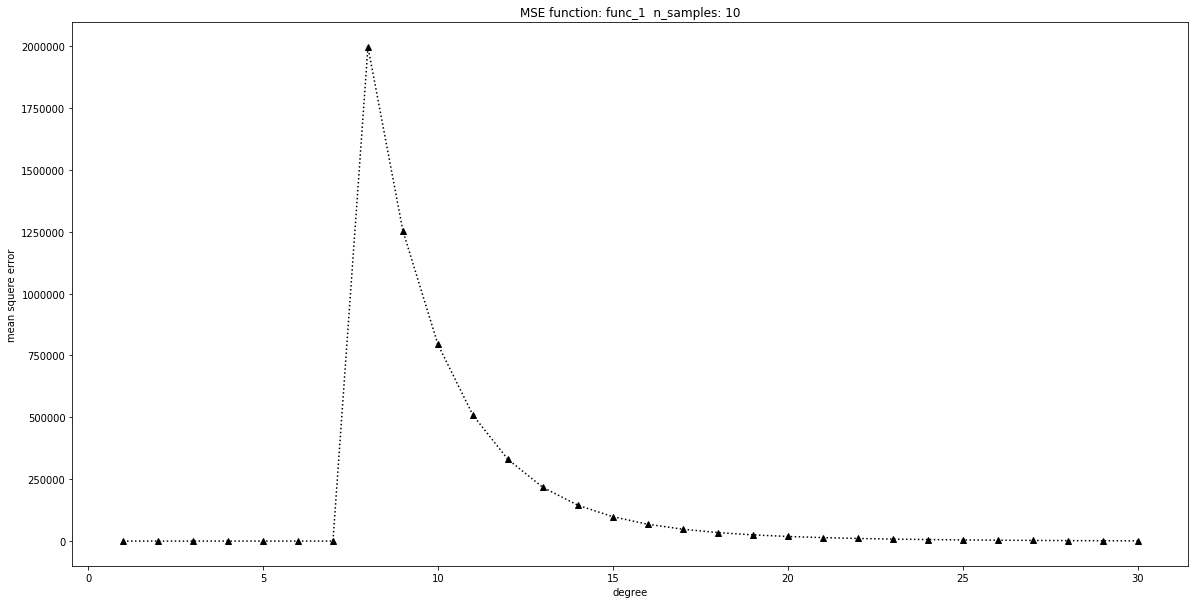

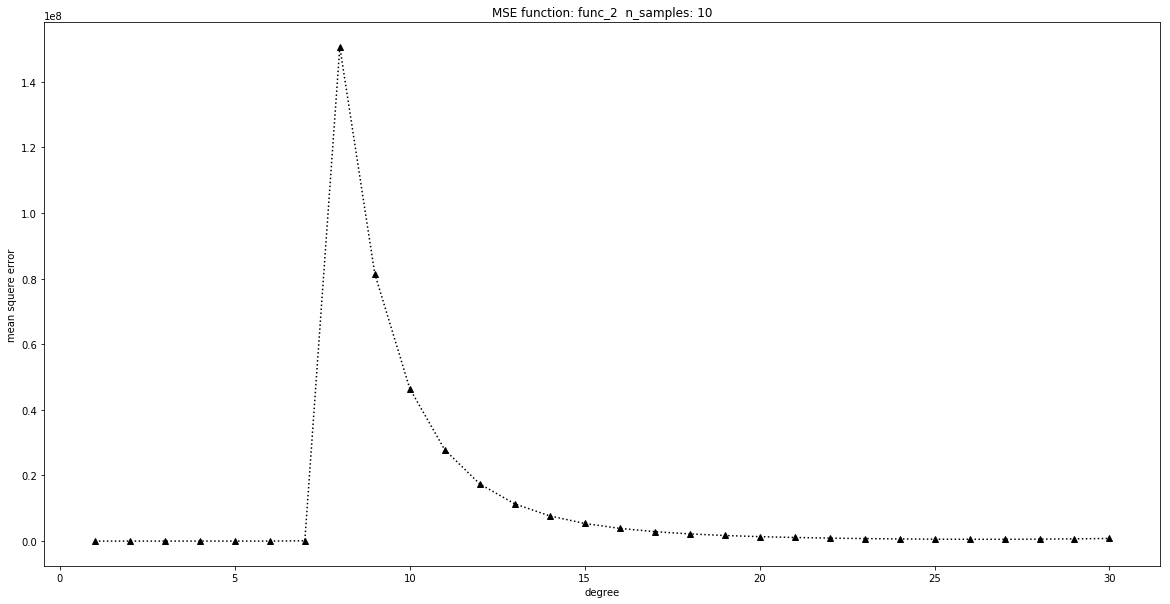

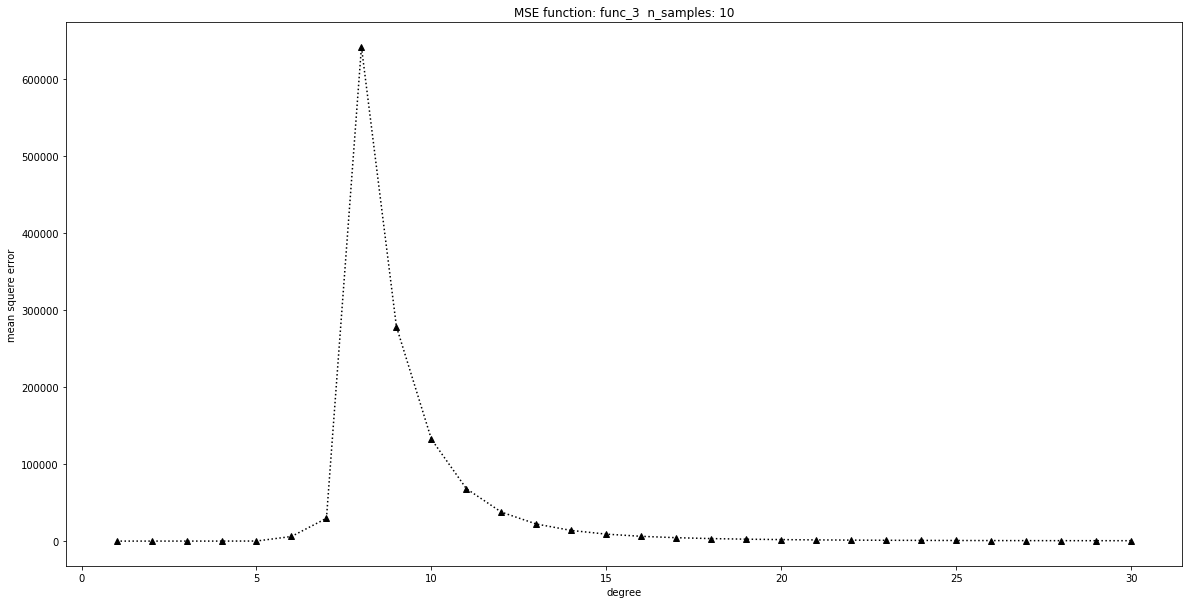

In [4]:
def func_1(x):
    return np.power(x, 3)

def func_2(x):
    return np.sin(x) * 2 * x
 
def func_3(x):
    return np.exp(np.power(x, 2))

n_samples = 10
plot_mean_square_error(func_1, degrees, n_samples)
plot_mean_square_error(func_2, degrees, n_samples)
plot_mean_square_error(func_3, degrees, n_samples)